In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
print("="*60)
print("ANALISIS SENTIMEN: KASUS SALAH TANGKAP BJORKA")
print("Tahap 1: Eksplorasi Data Awal (EDA)")
print("="*60)

ANALISIS SENTIMEN: KASUS SALAH TANGKAP BJORKA
Tahap 1: Eksplorasi Data Awal (EDA)


In [4]:
# 1. LOAD DATA
print("\n[1] MEMUAT DATA...")
df = pd.read_csv('youtube_comments_clean_only.csv')
print(f"✓ Data berhasil dimuat!")
print(f"✓ Jumlah baris: {len(df)}")
print(f"✓ Kolom: {df.columns.tolist()}")


[1] MEMUAT DATA...
✓ Data berhasil dimuat!
✓ Jumlah baris: 2177
✓ Kolom: ['clean_comment']


In [5]:
# 2. INFO DASAR DATA
print("\n[2] INFORMASI DASAR DATA")
print("-" * 60)
print(df.info())
print("\n" + df.head(10).to_string())



[2] INFORMASI DASAR DATA
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  2177 non-null   object
dtypes: object(1)
memory usage: 17.1+ KB
None

                                                                                                                                                                                                                                                                                                                                                                                         clean_comment
0  hacker lapang males patroli malam kalo pagi foto empat foto gerak kalo duit alam 2x lapor hilang kertas doang gak tindak gilir bikin ivent kasih amplop bantuin usaha ane tkp karna karyawan libat selisih buka musti urus terang an 4 juta i

In [6]:
# 3. CLEANING - Hapus baris kosong
print("\n[3] DATA CLEANING...")
before = len(df)
df = df.dropna(subset=['clean_comment'])
df = df[df['clean_comment'].str.strip() != '']
df = df.reset_index(drop=True)
after = len(df)
print(f"✓ Data sebelum cleaning: {before}")
print(f"✓ Data setelah cleaning: {after}")
print(f"✓ Data dihapus: {before - after}")


[3] DATA CLEANING...
✓ Data sebelum cleaning: 2177
✓ Data setelah cleaning: 2177
✓ Data dihapus: 0


In [7]:
# 4. STATISTIK DESKRIPTIF
print("\n[4] STATISTIK DESKRIPTIF")
print("-" * 60)

# Hitung panjang karakter dan jumlah kata
df['char_length'] = df['clean_comment'].apply(len)
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

stats = {
    'Total Komentar': len(df),
    'Rata-rata Panjang (char)': df['char_length'].mean(),
    'Median Panjang (char)': df['char_length'].median(),
    'Min Panjang (char)': df['char_length'].min(),
    'Max Panjang (char)': df['char_length'].max(),
    'Std Dev Panjang': df['char_length'].std(),
    'Rata-rata Jumlah Kata': df['word_count'].mean(),
    'Median Jumlah Kata': df['word_count'].median(),
}

for key, value in stats.items():
    print(f"{key:.<40} {value:.2f}")



[4] STATISTIK DESKRIPTIF
------------------------------------------------------------
Total Komentar.......................... 2177.00
Rata-rata Panjang (char)................ 54.28
Median Panjang (char)................... 36.00
Min Panjang (char)...................... 2.00
Max Panjang (char)...................... 1157.00
Std Dev Panjang......................... 63.65
Rata-rata Jumlah Kata................... 9.17
Median Jumlah Kata...................... 6.00


In [8]:
# 5. DISTRIBUSI PANJANG KOMENTAR
print("\n[5] DISTRIBUSI PANJANG KOMENTAR")
print("-" * 60)
length_bins = pd.cut(df['char_length'], 
                     bins=[0, 50, 100, 200, 500, float('inf')],
                     labels=['0-50', '51-100', '101-200', '201-500', '500+'])
print(length_bins.value_counts().sort_index())


[5] DISTRIBUSI PANJANG KOMENTAR
------------------------------------------------------------
char_length
0-50       1401
51-100      520
101-200     195
201-500      58
500+          3
Name: count, dtype: int64


In [9]:
# 6. ANALISIS KATA
print("\n[6] ANALISIS FREKUENSI KATA")
print("-" * 60)

# Stopwords Bahasa Indonesia
stopwords = ['yang', 'dan', 'di', 'ini', 'itu', 'dengan', 'untuk', 
             'pada', 'ke', 'dari', 'adalah', 'ada', 'atau', 'juga',
             'tidak', 'ya', 'aja', 'sih', 'gak', 'udah', 'tuh', 'deh',
             'kok', 'nya', 'kalo', 'gue', 'gw', 'lu', 'lo']

# Gabungkan semua komentar
all_text = ' '.join(df['clean_comment'].values)
words = all_text.lower().split()

# Filter stopwords dan kata pendek
filtered_words = [w for w in words if len(w) > 2 and w not in stopwords]

# Hitung frekuensi
word_freq = Counter(filtered_words)
top_20_words = word_freq.most_common(20)

print("\n20 Kata Paling Sering Muncul:")
for i, (word, count) in enumerate(top_20_words, 1):
    print(f"{i:2d}. {word:.<25} {count:>6} kali")


[6] ANALISIS FREKUENSI KATA
------------------------------------------------------------

20 Kata Paling Sering Muncul:
 1. bjorka...................    381 kali
 2. polisi...................    369 kali
 3. orang....................    154 kali
 4. hacker...................    150 kali
 5. tangkap..................    148 kali
 6. tau......................    116 kali
 7. kerja....................    115 kali
 8. nangkep..................    110 kali
 9. indonesia................    109 kali
10. judol....................    101 kali
11. bang.....................    101 kali
12. anak.....................     98 kali
13. perintah.................     92 kali
14. bener....................     74 kali
15. data.....................     73 kali
16. negara...................     72 kali
17. banget...................     72 kali
18. lapor....................     71 kali
19. salah....................     71 kali
20. nangkap..................     70 kali


In [10]:
# 7. VISUALISASI
print("\n[7] MEMBUAT VISUALISASI...")

fig = plt.figure(figsize=(16, 12))


[7] MEMBUAT VISUALISASI...


<Figure size 1600x1200 with 0 Axes>

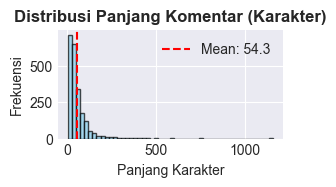

In [11]:
# Plot 1: Distribusi Panjang Karakter
plt.subplot(3, 2, 1)
plt.hist(df['char_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Panjang Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Komentar (Karakter)', fontsize=12, fontweight='bold')
plt.axvline(df['char_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["char_length"].mean():.1f}')
plt.legend()

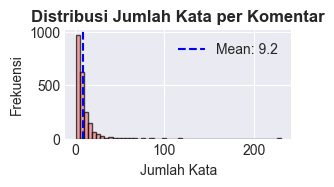

In [12]:
# Plot 2: Distribusi Jumlah Kata
plt.subplot(3, 2, 2)
plt.hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Kata per Komentar', fontsize=12, fontweight='bold')
plt.axvline(df['word_count'].mean(), color='blue', linestyle='--', label=f'Mean: {df["word_count"].mean():.1f}')
plt.legend()

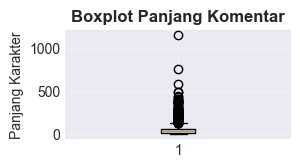

In [13]:
# Plot 3: Boxplot Panjang
plt.subplot(3, 2, 3)
plt.boxplot(df['char_length'], vert=True)
plt.ylabel('Panjang Karakter')
plt.title('Boxplot Panjang Komentar', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-50'),
  Text(1, 0, '51-100'),
  Text(2, 0, '101-200'),
  Text(3, 0, '201-500'),
  Text(4, 0, '500+')])

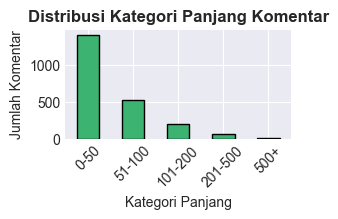

In [14]:
# Plot 4: Bar Chart Kategori Panjang
plt.subplot(3, 2, 4)
length_dist = length_bins.value_counts().sort_index()
length_dist.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Kategori Panjang')
plt.ylabel('Jumlah Komentar')
plt.title('Distribusi Kategori Panjang Komentar', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

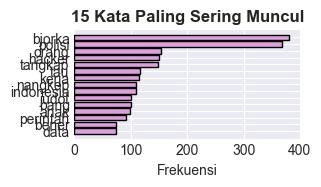

In [15]:
# Plot 5: Top 15 Kata
plt.subplot(3, 2, 5)
top_15 = word_freq.most_common(15)
words_list, counts_list = zip(*top_15)
plt.barh(range(len(words_list)), counts_list, color='plum', edgecolor='black')
plt.yticks(range(len(words_list)), words_list)
plt.xlabel('Frekuensi')
plt.title('15 Kata Paling Sering Muncul', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

✓ Visualisasi disimpan sebagai 'eda_visualization.png'


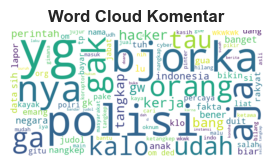

In [16]:
# Plot 6: Word Cloud
plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Komentar', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Visualisasi disimpan sebagai 'eda_visualization.png'")
plt.show()

In [17]:
# 8. CONTOH KOMENTAR
print("\n[8] CONTOH KOMENTAR")
print("-" * 60)
print("\n5 Komentar TERPENDEK:")
for i, row in df.nsmallest(5, 'char_length').iterrows():
    print(f"\n#{i+1} ({row['char_length']} char, {row['word_count']} kata)")
    print(f"  {row['clean_comment']}")

print("\n\n5 Komentar TERPANJANG:")
for i, row in df.nlargest(5, 'char_length').iterrows():
    print(f"\n#{i+1} ({row['char_length']} char, {row['word_count']} kata)")
    print(f"  {row['clean_comment'][:200]}..." if len(row['clean_comment']) > 200 else f"  {row['clean_comment']}")


[8] CONTOH KOMENTAR
------------------------------------------------------------

5 Komentar TERPENDEK:

#85 (2 char, 1 kata)
  a1

#151 (3 char, 1 kata)
  iya

#154 (3 char, 1 kata)
  loh

#195 (3 char, 1 kata)
  wow

#496 (3 char, 1 kata)
  woy


5 Komentar TERPANJANG:

#994 (1157 char, 230 kata)
  bicara ikut paulus t tuhan j yesus t yesus putra maria j t tuhan j yesus tuhan yesus lahir cipta maria t yesus lahir anak lakilaki j t ayah tuhan t tuhan j yesus tuhan yesus ayah tuhan yesus cipta lah...

#244 (762 char, 116 kata)
  mesti institusi polisi polisi polisi kayak pm kalo tni pisah polisi reguler satu kantor bikin mandiri lapor langsung pusat daerah koordinasi tugas awas tangkap tangan oknum polisi langgar hukum karirn...

#141 (591 char, 99 kata)
  jadi alami parah bro nabrak orang sampae patah tulang tanggungjawab korban biaya rs yg tanggungjawab laka lantas jasa raharja 2012 jasa raharja 10 jt saran kakak korban jasa raharja utk biaya rs aja t...

#2033 (499 char, 86 kata)
 

In [18]:
# 9. SIMPAN HASIL
print("\n[9] MENYIMPAN HASIL...")
df.to_csv('youtube_comments_with_stats.csv', index=False)
print("✓ Data dengan statistik disimpan sebagai 'youtube_comments_with_stats.csv'")

# Simpan statistik ke file txt
with open('eda_statistics.txt', 'w', encoding='utf-8') as f:
    f.write("STATISTIK EKSPLORASI DATA\n")
    f.write("="*60 + "\n\n")
    for key, value in stats.items():
        f.write(f"{key}: {value:.2f}\n")
    f.write("\n\nTOP 20 KATA:\n")
    f.write("-"*60 + "\n")
    for i, (word, count) in enumerate(top_20_words, 1):
        f.write(f"{i}. {word}: {count}\n")
print("✓ Statistik disimpan sebagai 'eda_statistics.txt'")


[9] MENYIMPAN HASIL...
✓ Data dengan statistik disimpan sebagai 'youtube_comments_with_stats.csv'
✓ Statistik disimpan sebagai 'eda_statistics.txt'
